In [1]:
adress = "/kaggle/input/cancer-rate-before-and-after-chernobyl/cancer_before_and_after_Chernobyl_Belarus.csv"

## Questions
### what is cancer rate before and after chernobel?
### which city has hieghst cases?
### which cancer type is more distributed?
### relation between cancer rate and sex?



## EXPLORATION AND PREPROCESSING OF DATA

In [2]:
# Importing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.register_matplotlib_converters()

In [3]:
#load of data
df = pd.read_csv("/kaggle/input/cancer-rate-before-and-after-chernobyl/cancer_before_and_after_Chernobyl_Belarus.csv")

In [4]:
df.head()

,year,sex,location,cancer_type,cases
0,1985,women,Gomel,skin,17.3
1,1985,women,Mogilev,skin,16.8
2,1986,women,Gomel,skin,15.6
3,1986,women,Mogilev,skin,18.3
4,1985,women,Belarus,skin,14.9


### NOTE: 
### 1985 = before chernobel (1977:1985)
### 1986 = after chernobel (1985:1994)

In [5]:
df['cancer_type'].value_counts()

skin        12
thyroid     12
lungs       12
pancreas    12
colon       12
rectum      12
kidney      12
Name: cancer_type, dtype: int64

In [6]:
df.query('cancer_type=="kidney" and year==1985').cases.value_counts()

1.5    1
1.9    1
1.7    1
2.8    1
3.1    1
3.5    1
Name: cases, dtype: int64

In [7]:
df.query('cancer_type=="lungs" and year==1985 and sex=="men"').cases.value_counts()

38.1    1
51.6    1
44.1    1
Name: cases, dtype: int64

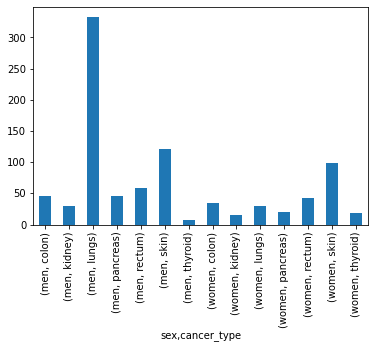

In [8]:
df.groupby(['sex','cancer_type'])['cases'].sum().plot(kind="bar");

In [9]:
df.isnull().sum()

year           0
sex            0
location       0
cancer_type    0
cases          0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         84 non-null     int64  
 1   sex          84 non-null     object 
 2   location     84 non-null     object 
 3   cancer_type  84 non-null     object 
 4   cases        84 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ KB


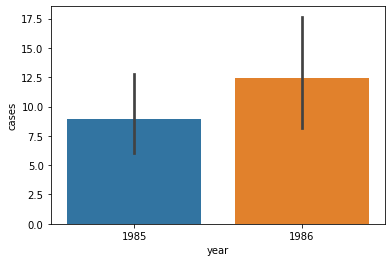

In [12]:
sns.barplot(x=df.year, y=df.cases);

#### cases of cancer increased after chernobel

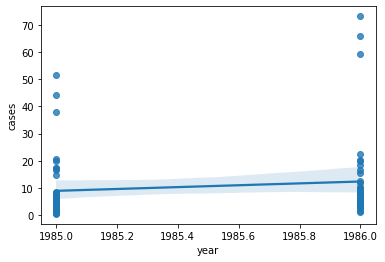

In [13]:
sns.regplot(y="cases", x = "year", data=df);

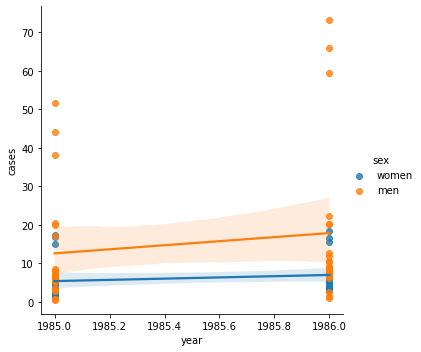

In [14]:
sns.lmplot(y="cases", x = "year", hue="sex", data=df);

#### increase cancer rate in men > women

In [15]:
#get cases of cancer acc to cancer type before and after chernobel
df.groupby(['cancer_type','year'])['cases'].sum()

cancer_type  year
colon        1985     32.4
             1986     48.7
kidney       1985     14.5
             1986     30.4
lungs        1985    146.7
             1986    214.4
pancreas     1985     28.0
             1986     36.4
rectum       1985     42.2
             1986     58.1
skin         1985    106.6
             1986    113.2
thyroid      1985      6.4
             1986     19.8
Name: cases, dtype: float64

In [16]:
balate=['#45BC86', '#8DE4D7','#D4FF33', '#FFBF33', "#FF6C33", "#5E1D03", "#3B1202"]


In [17]:
mybal=['#45BC86', '#45BC86','#8DE4D7', '#8DE4D7', '#D4FF33','#D4FF33', '#FFBF33', '#FFBF33' ]

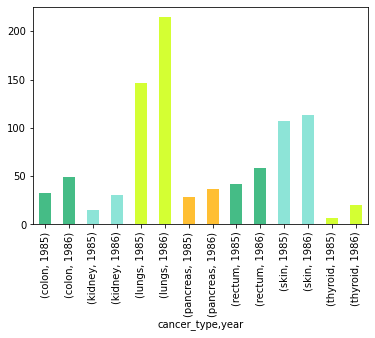

In [18]:
#plotting of results above

df.groupby(['cancer_type','year'])['cases'].sum().plot(kind="bar", color=mybal);

### seem skin cancer increased by a little rate while lung and thyroid cancer increased by the highiest rate

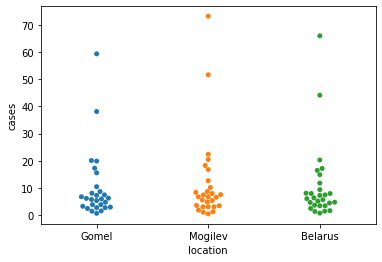

In [19]:
sns.swarmplot(x=df['location'], y=df['cases']);

### cases is the most in Moglivec then Belarus then Gomel

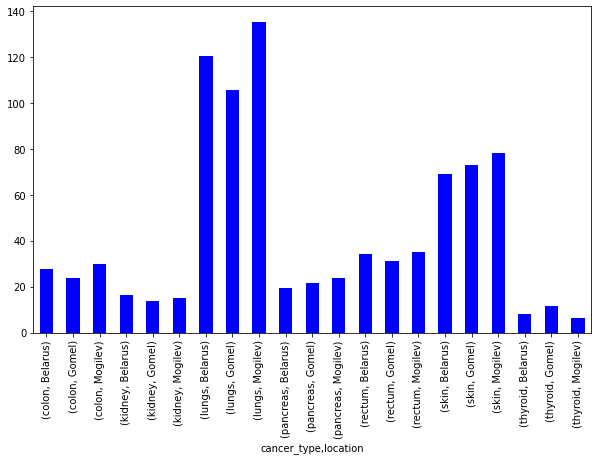

In [20]:
#plotting of results above
plt.figure(figsize=(10, 6))
df.groupby(['cancer_type', 'location'])['cases'].sum().plot(kind="bar", color='b');

### Gomel has the highest cases of thyroid cancer

In [21]:
df.groupby(['location', 'year'])['cases'].sum()

location  year
Belarus   1985    121.5
          1986    173.5
Gomel     1985    116.4
          1986    163.3
Mogilev   1985    138.9
          1986    184.2
Name: cases, dtype: float64

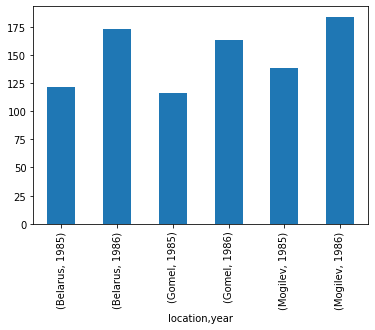

In [22]:
df.groupby(['location', 'year'])['cases'].sum().plot(kind='bar');

### Mogilev has highest number of cases 

In [23]:
df.groupby(['sex', 'year'])[ 'cases'].mean()

sex    year
men    1985    12.576190
       1986    17.847619
women  1985     5.366667
       1986     6.961905
Name: cases, dtype: float64

In [24]:
#increase rate for men
(17.847619-12.576190)/12.58

0.4190325119236885

In [25]:
#increase rate for women
(6.961905-5.366667)/5.37

0.29706480446927375

In [26]:
print("Increase rate for men is: {:.0%} \nIncrease rate for women is: {:.0%}".format((5.27/12.58),(1.6/5.37)))

Increase rate for men is: 42% 
Increase rate for women is: 30%


In [27]:
(42+30)/2

36.0

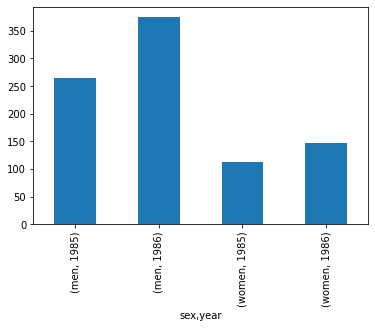

In [28]:
df.groupby(['sex', 'year'])[ 'cases'].sum().plot(kind="bar");

In [29]:
df.groupby('year')['cases'].sum()

year
1985    376.8
1986    521.0
Name: cases, dtype: float64

In [30]:
print("Increase rate of cancer is: {:.0%}".format((521-376.8)/376.8))

Increase rate of cancer is: 38%


In [31]:
df.groupby(['location', 'sex'])['cases'].sum()

location  sex  
Belarus   men      209.3
          women     85.7
Gomel     men      195.7
          women     84.0
Mogilev   men      233.9
          women     89.2
Name: cases, dtype: float64

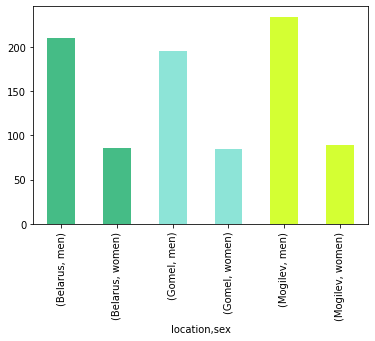

In [32]:
df.groupby(['location', 'sex'])['cases'].sum().plot(kind="bar", color=mybal);

### Location do not affect cancer rate rate between women.

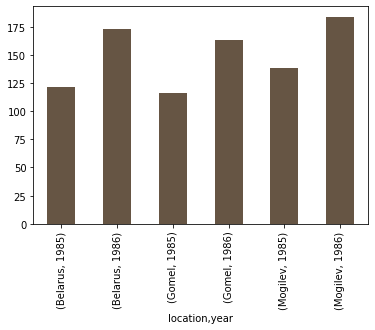

In [33]:
df.groupby(['location', 'year'])['cases'].sum().plot(kind="bar", color="#654");

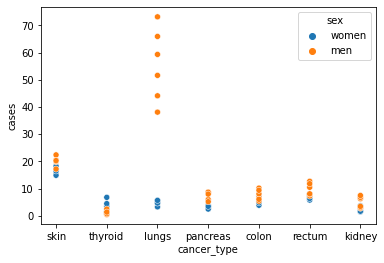

In [34]:
sns.scatterplot(x=df.cancer_type, y=df.cases, hue=df.sex, data=df);

### Lung cancer cases of men more than cases of women by high rate may that becauese of ciggerette or other factors. 
### Thyroid cancer cases are more prevalent in women > men. 

In [35]:
df['cancer_type']

0       skin
1       skin
2       skin
3       skin
4       skin
       ...  
79    kidney
80    kidney
81    kidney
82    kidney
83    kidney
Name: cancer_type, Length: 84, dtype: object

In [36]:
df.query('cancer_type=="thyroid"').groupby(['sex','year'])['cases'].sum()

sex    year
men    1985     2.0
       1986     5.0
women  1985     4.4
       1986    14.8
Name: cases, dtype: float64

### All cancer types cases of men > women except thyroid 

### woman has thyroid cancer > male

In [37]:
print("Increase rate for men is: {:.0%} \nIncrease rate for women is: {:.0%}".format((5.27/12.58),(1.6/5.37)))

Increase rate for men is: 42% 
Increase rate for women is: 30%


# Conclusions:
## 1- Cancer rate increased after chernobel by 38%.
## 2- Increase of rate in men > women.
## 3- Mogiliv has hieghst number of cases.
## 4- Gomel has highst cases of thyroid cancer.
## 5- Rate incresed in women by 30%.
## 6- Rate increased in man by 42%.
## 7- In general cancer is more common in men than women except thyroid cancer.
## 8- Lung cancer cases in man > women by high rate.